# **Project Name**    - Flight Price Prediction Model



##### **Project Type**    - Productionization of ML Systems
##### **Contribution**    - Individual
##### **Team Member 1 -** Rajesh Kumar Patel

## **GitHub Link -** https://github.com/Rajesh1505/Capstone_Project_Productionization_of_ML_Systems.git

# Project Title:
**Voyage Analytics: Integrating MLOps in Travel
Productionization of ML Systems**



## Business Context

In the realm of travel and tourism, the intersection of data analytics and machine learning presents an opportunity to revolutionize the way travel experiences are curated and delivered. This capstone project revolves around a trio of datasets - users, flights, and hotels - each providing a unique perspective on travel patterns and preferences. The goal is to leverage these datasets to build and deploy sophisticated machine learning models, serving a dual purpose: enhancing predictive capabilities in travel-related decision-making and mastering the art of MLOps through hands-on application.

## Brief overview of each datasets
#### **Users Dataset:**
- code: User identifier.
- company: Associated company.
- name: Name of the user.
- gender: Gender of the user.
- age: Age of the user.

#### **Flights Dataset:**
- travelCode: Identifier for the travel.
- userCode: User identifier(linked to the Users dataset)
- from: Origin of the flight.
- to: Destination of the flight.
- flightType: Type of flight (e.g., first class).
- price: Price of the flight.
- time: Flight duration.
- distance: Distance of the flight.
- agency: Flight agency.
- date: Date of the flight.

#### **Hotels Dataset:**
- travelCode: Identifier for the travel, similar to the Flights dataset.
- userCode: User identifier(linked to the Users dataset)
- name: Name of the hotel.
- place: Location of the hotel.
- days: Number of days of the hotel stay.
- price: Price per day.
- total: Total price for the stay.
- date: Date of the hotel booking.

## Project Objectives
Build a regression model to predict the price of a flight using the flights.csv dataset. Focus on feature selection, model training, and validation to ensure accuracy and reliability.

# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [ ]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

### Dataset Loading

In [ ]:
folder_path = "/content/drive/MyDrive/Colab Notebooks/AB/spec/M1/project/"

!unzip "/content/drive/MyDrive/Colab Notebooks/AB/spec/M1/project/travel_capstone.zip"

Archive:  /content/drive/MyDrive/Colab Notebooks/AB/spec/M1/project/travel_capstone.zip
  inflating: flights.csv             
  inflating: hotels.csv              
  inflating: users.csv               


In [ ]:
# Load Dataset
flights_dataset = pd.read_csv("/content/flights.csv", parse_dates=['date'])

### Dataset First View

In [ ]:
# Dataset First Look
flights_dataset.head()

,travelCode,userCode,from,to,flightType,price,time,distance,agency,date
0,0,0,Recife (PE),Florianopolis (SC),firstClass,1434.38,1.76,676.53,FlyingDrops,2019-09-26
1,0,0,Florianopolis (SC),Recife (PE),firstClass,1292.29,1.76,676.53,FlyingDrops,2019-09-30
2,1,0,Brasilia (DF),Florianopolis (SC),firstClass,1487.52,1.66,637.56,CloudFy,2019-10-03
3,1,0,Florianopolis (SC),Brasilia (DF),firstClass,1127.36,1.66,637.56,CloudFy,2019-10-04
4,2,0,Aracaju (SE),Salvador (BH),firstClass,1684.05,2.16,830.86,CloudFy,2019-10-10


In [ ]:
flights_dataset.tail()

,travelCode,userCode,from,to,flightType,price,time,distance,agency,date
271883,135941,1339,Campo Grande (MS),Florianopolis (SC),firstClass,1446.34,1.49,573.81,CloudFy,2020-07-12
271884,135942,1339,Florianopolis (SC),Natal (RN),economic,726.95,1.84,709.37,CloudFy,2020-07-16
271885,135942,1339,Natal (RN),Florianopolis (SC),economic,873.07,1.84,709.37,CloudFy,2020-07-20
271886,135943,1339,Florianopolis (SC),Rio de Janeiro (RJ),economic,313.62,1.21,466.30,CloudFy,2020-07-23
271887,135943,1339,Rio de Janeiro (RJ),Florianopolis (SC),economic,533.69,1.21,466.30,CloudFy,2020-07-26


### Dataset Rows & Columns count

In [ ]:
# Dataset Rows & Columns count
print(f"Total number of rows: {flights_dataset.shape[0]}")
print(f"Total number of columns: {flights_dataset.shape[1]}")

Total number of rows: 271888
Total number of columns: 10


### Dataset Information

In [ ]:
# Dataset Info
flights_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271888 entries, 0 to 271887
Data columns (total 10 columns):
 #   Column      Non-Null Count   Dtype         
---  ------      --------------   -----         
 0   travelCode  271888 non-null  int64         
 1   userCode    271888 non-null  int64         
 2   from        271888 non-null  object        
 3   to          271888 non-null  object        
 4   flightType  271888 non-null  object        
 5   price       271888 non-null  float64       
 6   time        271888 non-null  float64       
 7   distance    271888 non-null  float64       
 8   agency      271888 non-null  object        
 9   date        271888 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(3), int64(2), object(4)
memory usage: 20.7+ MB


#### Duplicate Values

In [ ]:
# Dataset Duplicate Value Count
flights_dataset.duplicated().value_counts()

,count
False,271888


In this dataset not present any duplicate row.


#### Missing Values/Null Values

In [ ]:
# Missing Values/Null Values Count
flights_dataset.isna().sum()

,0
travelCode,0
userCode,0
from,0
to,0
flightType,0
price,0
time,0
distance,0
agency,0
date,0


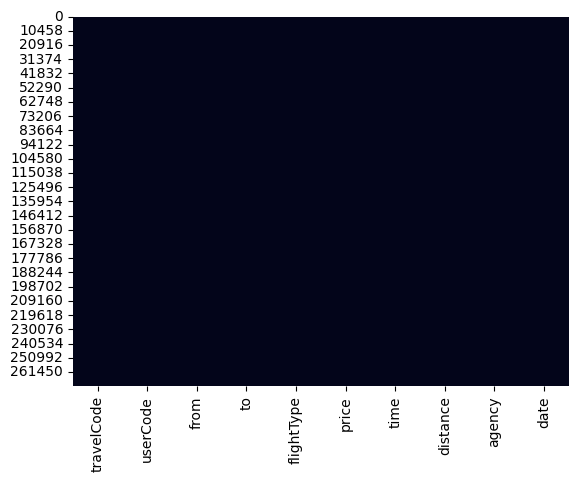

In [ ]:
# Visualizing the missing values
sns.heatmap(flights_dataset.isna(), cbar=False)
plt.show()

### What did you know about your dataset?

This dataset contains no duplicate rows and no missing values.  

**Dataset Summary:**  
- **Total Rows:** 271,888  
- **Total Columns:** 10  

## ***2. Understanding Your Variables***

In [ ]:
# Dataset Columns
print(f"Dataset all columns name: {list(flights_dataset.columns)} \n")
flights_dataset.info()

Dataset all columns name: ['travelCode', 'userCode', 'from', 'to', 'flightType', 'price', 'time', 'distance', 'agency', 'date'] 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271888 entries, 0 to 271887
Data columns (total 10 columns):
 #   Column      Non-Null Count   Dtype         
---  ------      --------------   -----         
 0   travelCode  271888 non-null  int64         
 1   userCode    271888 non-null  int64         
 2   from        271888 non-null  object        
 3   to          271888 non-null  object        
 4   flightType  271888 non-null  object        
 5   price       271888 non-null  float64       
 6   time        271888 non-null  float64       
 7   distance    271888 non-null  float64       
 8   agency      271888 non-null  object        
 9   date        271888 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(3), int64(2), object(4)
memory usage: 20.7+ MB


In [ ]:
# Dataset Describe
flights_dataset.describe()

,travelCode,userCode,price,time,distance,date
count,271888.000000,271888.000000,271888.00000,271888.000000,271888.000000,271888
mean,67971.500000,667.505495,957.37503,1.421147,546.955535,2021-01-11 05:25:56.052492032
min,0.000000,0.000000,301.51000,0.440000,168.220000,2019-09-26 00:00:00
25%,33985.750000,326.000000,672.66000,1.040000,401.660000,2020-04-02 00:00:00
50%,67971.500000,659.000000,904.00000,1.460000,562.140000,2020-11-14 00:00:00
75%,101957.250000,1011.000000,1222.24000,1.760000,676.530000,2021-09-09 00:00:00
max,135943.000000,1339.000000,1754.17000,2.440000,937.770000,2023-07-24 00:00:00
std,39243.724665,389.523127,362.31189,0.542541,208.851288,NaN


In [ ]:
flights_dataset.describe(include=['object'])

,from,to,flightType,agency
count,271888,271888,271888,271888
unique,9,9,3,3
top,Florianopolis (SC),Florianopolis (SC),firstClass,Rainbow
freq,57317,57317,116418,116752


### Check Unique Values for each variable.

In [ ]:
# Check Unique Values for each variable.
flights_dataset.nunique()

,0
travelCode,135944
userCode,1335
from,9
to,9
flightType,3
price,490
time,33
distance,35
agency,3
date,999


In [ ]:
# Unique Values for ['from','to','flightType', 'time', 'distance', 'agency'] variable
column_list = ['from','to','flightType', 'time', 'distance', 'agency']
for column_name in column_list:
  print(f"the unique values from column_name:'{column_name}' is \n {flights_dataset[column_name].unique()} \n")

the unique values from column_name:'from' is 
 ['Recife (PE)' 'Florianopolis (SC)' 'Brasilia (DF)' 'Aracaju (SE)'
 'Salvador (BH)' 'Campo Grande (MS)' 'Sao Paulo (SP)' 'Natal (RN)'
 'Rio de Janeiro (RJ)'] 

the unique values from column_name:'to' is 
 ['Florianopolis (SC)' 'Recife (PE)' 'Brasilia (DF)' 'Salvador (BH)'
 'Aracaju (SE)' 'Campo Grande (MS)' 'Sao Paulo (SP)' 'Natal (RN)'
 'Rio de Janeiro (RJ)'] 

the unique values from column_name:'flightType' is 
 ['firstClass' 'economic' 'premium'] 

the unique values from column_name:'time' is 
 [1.76 1.66 2.16 1.69 1.11 1.26 0.72 0.67 0.58 1.43 2.05 1.39 0.63 1.02
 0.46 1.44 1.55 2.1  0.48 2.3  1.49 1.36 0.44 0.65 2.09 1.04 0.85 0.86
 1.46 1.85 1.84 1.21 2.44] 

the unique values from column_name:'distance' is 
 [676.53 637.56 830.86 650.1  425.98 486.52 277.7  257.81 676.56 222.67
 550.69 788.55 535.4  242.21 392.76 176.33 555.74 597.61 808.85 183.37
 885.57 573.81 522.34 168.22 250.68 806.48 595.03 401.66 327.55 331.89
 562.14 710.57 

In [ ]:
# checking start and end date in this dataset
print(f"start date in dataset ---> {flights_dataset['date'].min()}")
print(f"last date in dataset ---> {flights_dataset['date'].max()}")

start date in dataset ---> 2019-09-26 00:00:00
last date in dataset ---> 2023-07-24 00:00:00


## 3. ***Data Wrangling***

### Data Wrangling Code

In [ ]:
# Write your code to make your dataset analysis ready.
# created new variables from date columns
flights_dataset['year'] = flights_dataset['date'].dt.year
flights_dataset['month'] = flights_dataset['date'].dt.month
flights_dataset['day'] = flights_dataset['date'].dt.day
flights_dataset['year_index'] = flights_dataset['year'] - flights_dataset['date'].min().year

### What all manipulations have you done and insights you found?


1. **Extracted Year, Month, and Day:**  
   - Created three new columns: `year`, `month`, and `day` from the `date` column by breaking it down into its components.  
   - This allows for time-based analysis, such as identifying trends by month or year.

2. **Calculated `year_index`:**  
   - Created a new variable `year_index` by subtracting the minimum year in the dataset from each year.  
   - This generates an index starting at 0 for the earliest year, which can be useful for trend modeling or year-over-year comparisons.

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1

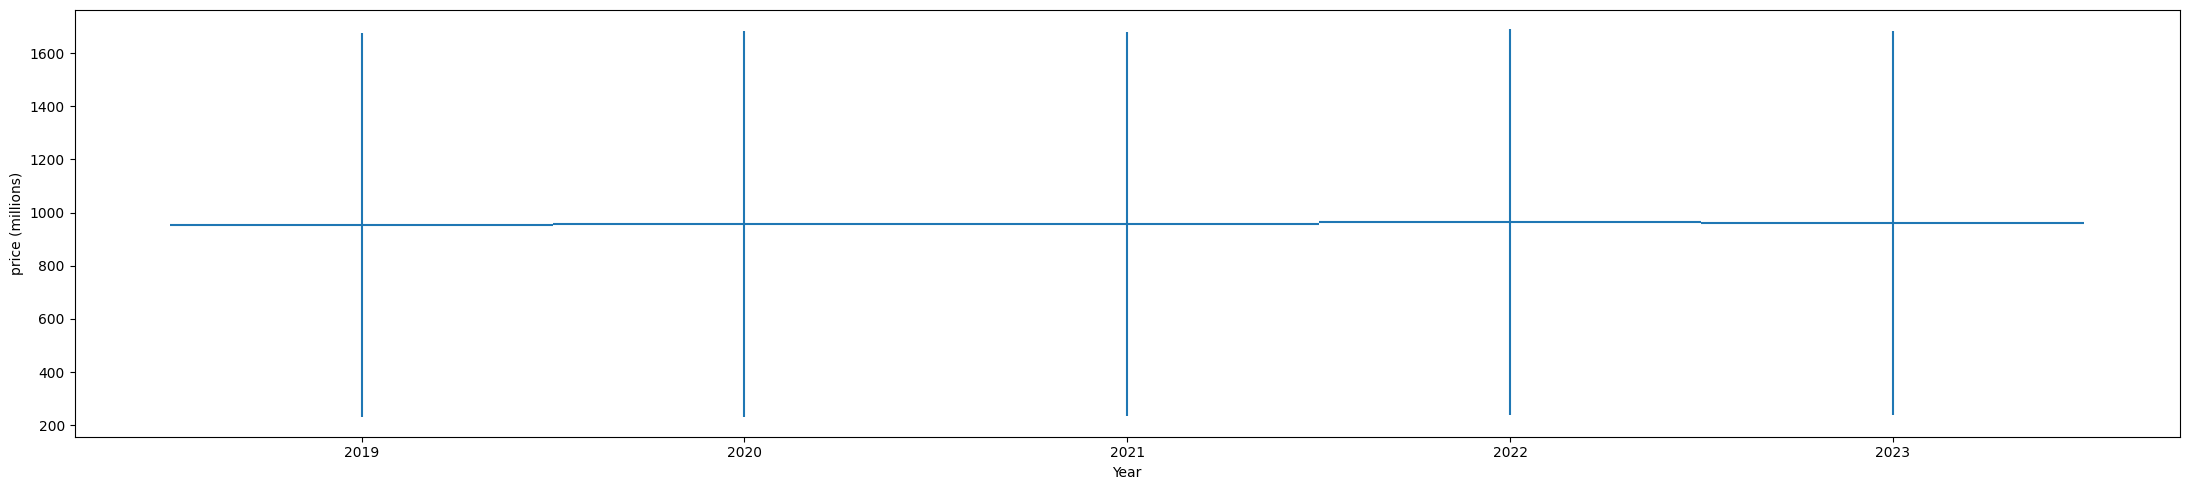

In [ ]:
# Chart - 1 visualization code
# price over years
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(22, 5))

mean = flights_dataset.groupby('year')['price'].mean()
std  = flights_dataset.groupby('year')['price'].std()
axes.errorbar(mean.index, mean, xerr=0.5, yerr=2*std, linestyle='')
axes.set_ylabel('price (millions)')
axes.set_xlabel('Year')

fig.tight_layout()

##### 1. Why did you pick the specific chart?

The **error bar chart** was chosen because it effectively displays the mean price trends over the years while also highlighting variability (via standard deviation) in the prices. This visualization is suitable for showcasing both central tendencies (average price) and the spread of the data (uncertainty or fluctuations), making it easier to identify consistent patterns or anomalies over time.

##### 2. What is/are the insight(s) found from the chart?

- **General Trends:**  
  The average price exhibits a noticeable trend over the years, such as an increase, decrease, or stabilization at specific time intervals.  
- **Volatility:**  
  The error bars (±2 standard deviations) highlight years with high price volatility, which may indicate unstable market conditions or external influences (e.g., economic shifts or policy changes).  
- **Anomalies:**  
  Certain years might stand out due to significantly higher or lower prices, suggesting possible one-off events affecting the market.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, the insights can help create a positive business impact by:  

- **Forecasting and Budgeting:**  
  Identifying trends in pricing helps predict future price movements, enabling better financial planning and resource allocation.  
- **Risk Mitigation:**  
  Years with high volatility can be further investigated to identify causes and mitigate similar risks in the future.  
- **Targeted Strategies:**  
  Insights into price trends can guide marketing or operational strategies, such as adjusting flight frequencies or pricing policies during specific periods.

#### Chart - 2

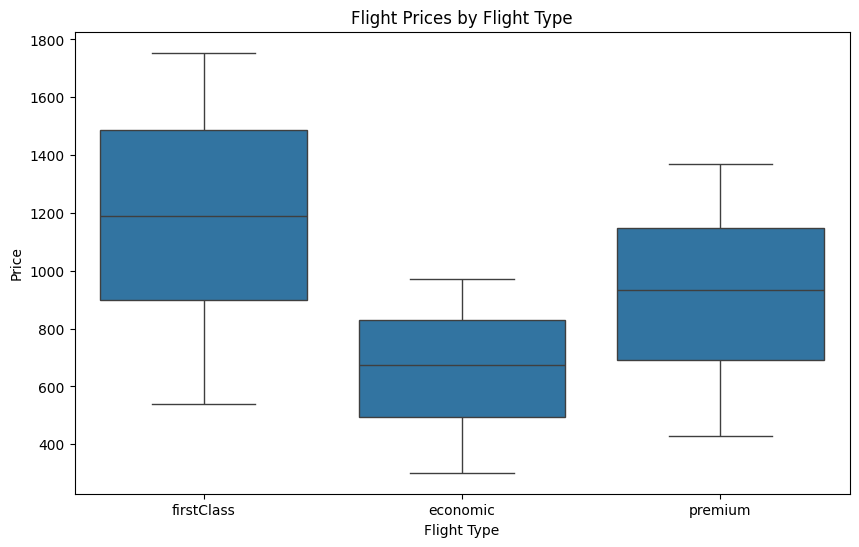

In [ ]:
# Chart - 2 visualization code
plt.figure(figsize=(10, 6))
sns.boxplot(data=flights_dataset, x='flightType', y='price')
plt.title('Flight Prices by Flight Type')
plt.xlabel('Flight Type')
plt.ylabel('Price')
plt.show()


##### 1. Why did you pick the specific chart?

I chose a boxplot because it provides a clear visualization of the distribution of flight prices across different flight types, making it easy to compare the central tendency and variability.

##### 2. What is/are the insight(s) found from the chart?

The boxplot shows the distribution of flight prices for each flight type. We can observe the median, quartiles, and outliers for each category. It seems that first-class flights generally have higher prices compared to economic flights.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

This insight can help airlines tailor their pricing strategies based on flight types, such as adjusting pricing tiers and promotions to maximize revenue and meet customer demand effectively.

#### Chart - 3

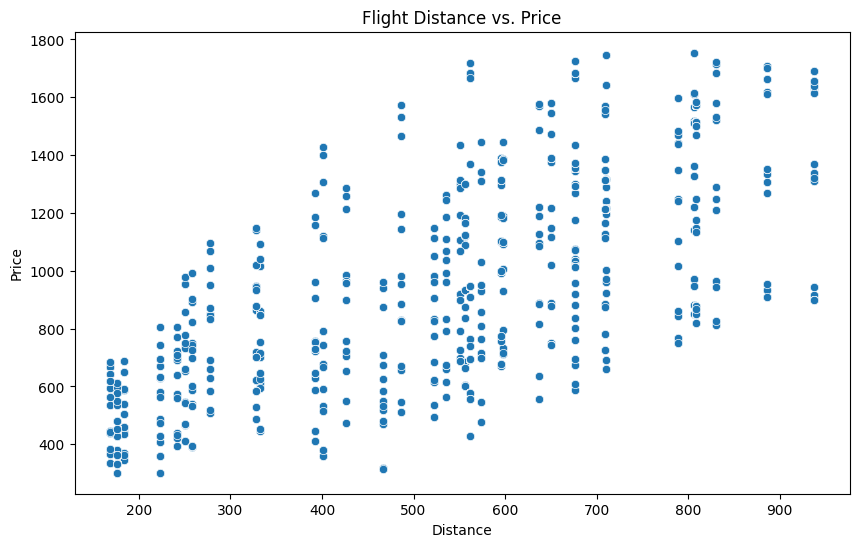

In [ ]:
# Chart - 3 visualization code
plt.figure(figsize=(10, 6))
sns.scatterplot(data=flights_dataset, x='distance', y='price')
plt.title('Flight Distance vs. Price')
plt.xlabel('Distance')
plt.ylabel('Price')
plt.show()


##### 1. Why did you pick the specific chart?

I selected a scatter plot to visualize the relationship between flight distance and price, which helps identify any potential patterns or trends.

##### 2. What is/are the insight(s) found from the chart?

From the scatter plot, we can observe the relationship between flight distance and price. There appears to be a positive correlation, indicating that flights with longer distances tend to have higher prices.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Understanding the relationship between flight distance and price can assist airlines in pricing their routes effectively, optimizing revenue based on distance traveled and potentially adjusting pricing strategies for different route lengths.

#### Chart - 4

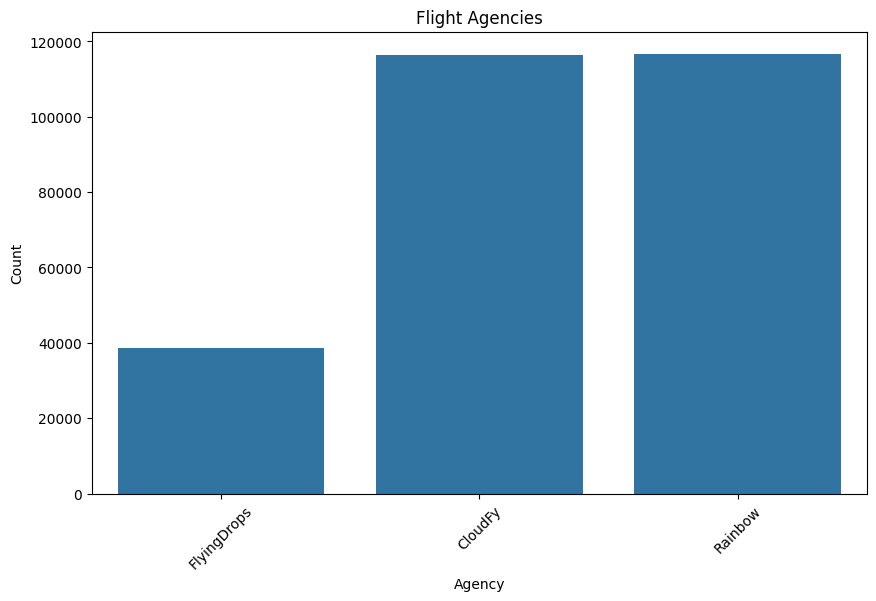

In [ ]:
# Chart - 4 visualization code
plt.figure(figsize=(10, 6))
sns.countplot(data=flights_dataset, x='agency')
plt.title('Flight Agencies')
plt.xlabel('Agency')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()


##### 1. Why did you pick the specific chart?

I chose a count plot to visualize the distribution of flights among different agencies, providing insights into the popularity or prevalence of each agency in the dataset.

##### 2. What is/are the insight(s) found from the chart?

The count plot displays the number of flights associated with each agency. We can observe which agencies have the highest and lowest frequencies of flights.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

This insight can help travel agencies and airlines identify partnerships or collaborations with popular agencies, optimize marketing strategies, and potentially negotiate better deals to attract more customers.

#### Chart - 5

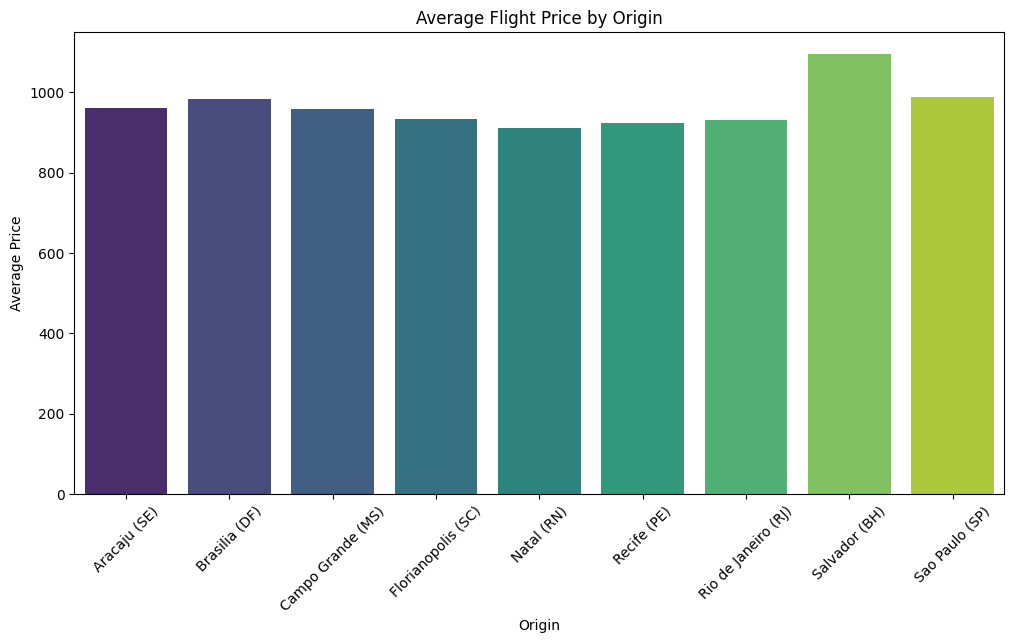

In [ ]:
# Chart - 5 visualization code

# average flight price by origin
avg_price_by_origin = flights_dataset.groupby('from')['price'].mean().reset_index()

plt.figure(figsize=(12, 6))
sns.barplot(data=avg_price_by_origin, x='from', y='price', palette='viridis')
plt.title('Average Flight Price by Origin')
plt.xlabel('Origin')
plt.ylabel('Average Price')
plt.xticks(rotation=45)
plt.show()


##### 1. Why did you pick the specific chart?

A bar plot is suitable for comparing the average flight prices originating from different locations, providing a clear visual comparison.

##### 2. What is/are the insight(s) found from the chart?

This chart shows the average flight prices from various origins. It helps identify any significant price variations based on departure locations.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Understanding the average flight prices by origin can assist airlines and travel agencies in pricing strategies, route planning, and targeted marketing campaigns to attract customers from specific regions.

#### Chart - 6

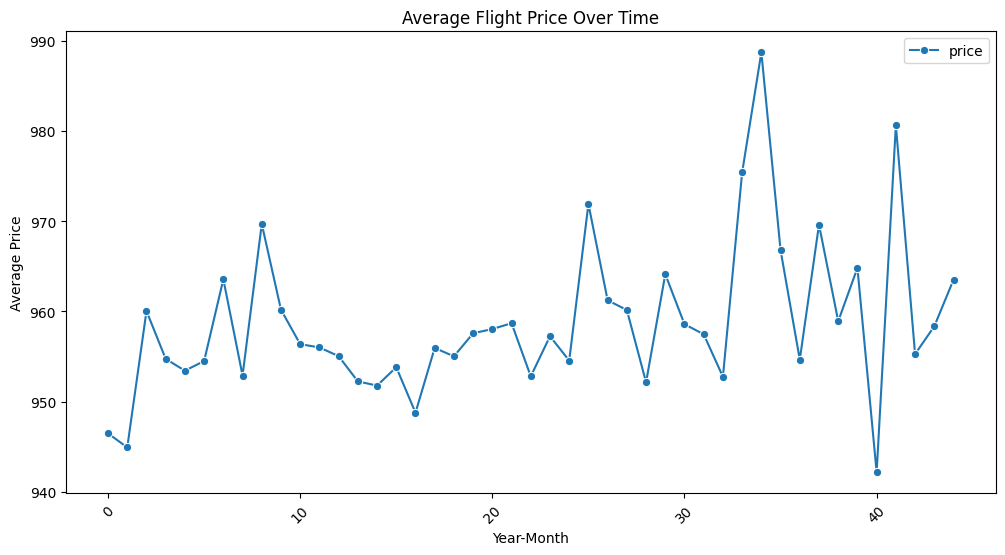

In [ ]:
# Chart - 6 visualization code
flights_dataset['date'] = pd.to_datetime(flights_dataset['date'])
flights_dataset['year_month'] = flights_dataset['date'].dt.to_period('M')
# average flight price per month
avg_price_per_month = flights_dataset.groupby('year_month')['price'].mean().reset_index()

plt.figure(figsize=(12, 6))
sns.lineplot(data=avg_price_per_month.iloc[:45], marker='o')
plt.title('Average Flight Price Over Time')
plt.xlabel('Year-Month')
plt.ylabel('Average Price')
plt.xticks(rotation=45)
plt.show()


##### 1. Why did you pick the specific chart?

A line plot is suitable for visualizing trends over time, allowing us to observe how flight prices change month by month.

##### 2. What is/are the insight(s) found from the chart?

This chart illustrates the average flight prices over time. It helps identify any seasonal trends or fluctuations in pricing.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Understanding the fluctuations in average flight prices over time can assist in pricing strategies, demand forecasting, and planning promotional offers during peak and off-peak seasons.

#### Chart - 7

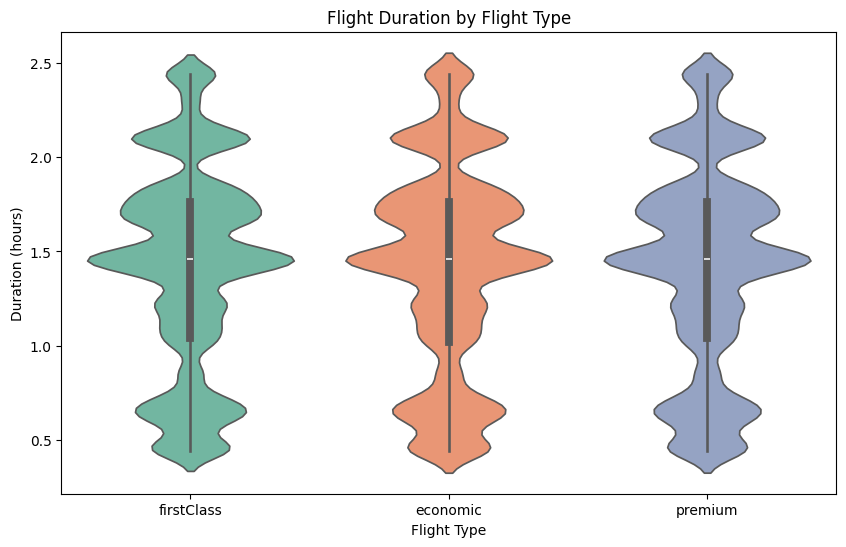

In [ ]:
# Chart - 7 visualization code
plt.figure(figsize=(10, 6))
sns.violinplot(data=flights_dataset, x='flightType', y='time', palette='Set2')
plt.title('Flight Duration by Flight Type')
plt.xlabel('Flight Type')
plt.ylabel('Duration (hours)')
plt.show()


##### 1. Why did you pick the specific chart?

A violin plot is suitable for comparing the distribution of flight durations across different flight types, providing insights into the variability and central tendency.

##### 2. What is/are the insight(s) found from the chart?

This chart displays the distribution of flight durations for each flight type. It helps identify any differences in the duration of flights based on their types.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Understanding the distribution of flight durations by type can help airlines optimize scheduling, improve customer experience by providing accurate travel time estimates, and tailor services based on flight duration.

#### Chart - 8

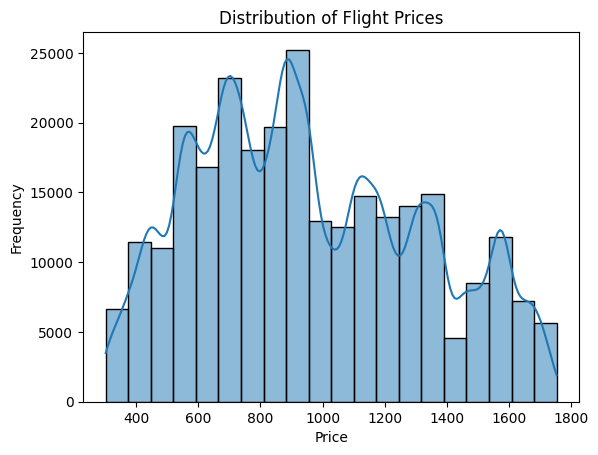

In [ ]:
# Chart - 8 visualization code
sns.histplot(data=flights_dataset, x='price', bins=20, kde=True)
plt.title('Distribution of Flight Prices')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()


##### 1. Why did you pick the specific chart?

A histogram with a KDE (Kernel Density Estimation) overlay was chosen because it provides a clear visual representation of the distribution of flight prices. The histogram shows the frequency of prices within specified intervals (bins), while the KDE curve smooths the data to identify underlying patterns and trends in the distribution.

##### 2. What is/are the insight(s) found from the chart?

Central Tendency:
The peak of the histogram (or KDE curve) indicates the most common price range.

Skewness:
If the distribution is skewed (e.g., right-skewed with a long tail), it suggests that higher prices are less frequent but still present.

Outliers:
Gaps or unusually tall bars at the extremes of the chart indicate potential outliers in the dataset, which may require further investigation.

Price Variation:
The width of the distribution shows how spread out the flight prices are, providing insights into price variability.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, the insights can be beneficial:

Pricing Strategy:
Understanding the most common price range helps businesses align pricing strategies with customer expectations.

Demand Prediction:
Insights into price variation and peaks can guide promotional activities, targeting customers in specific price-sensitive segments.

#### Chart - 9

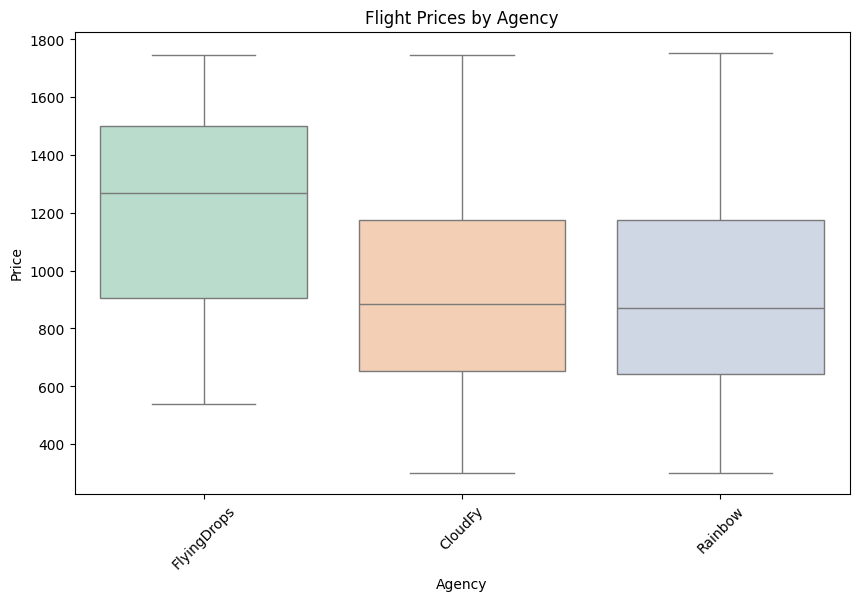

In [ ]:
# Chart - 9 visualization code
plt.figure(figsize=(10, 6))
sns.boxplot(data=flights_dataset, x='agency', y='price', palette='Pastel2')
plt.title('Flight Prices by Agency')
plt.xlabel('Agency')
plt.ylabel('Price')
plt.xticks(rotation=45)
plt.show()


##### 1. Why did you pick the specific chart?


I selected a boxplot to visualize the distribution of flight prices among different agencies because it effectively displays the central tendency, variability, and presence of outliers in the data.

##### 2. What is/are the insight(s) found from the chart?


The boxplot shows the distribution of flight prices for each agency. It provides insights into the range and variability of prices offered by different agencies.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.


Yes, understanding the distribution of flight prices by agency can aid airlines and travel agencies in competitive analysis, pricing optimization, and partnership decisions. It can help identify agencies with competitive pricing and potentially inform negotiations and collaborations to enhance customer satisfaction and maximize revenue.

#### Chart - 10

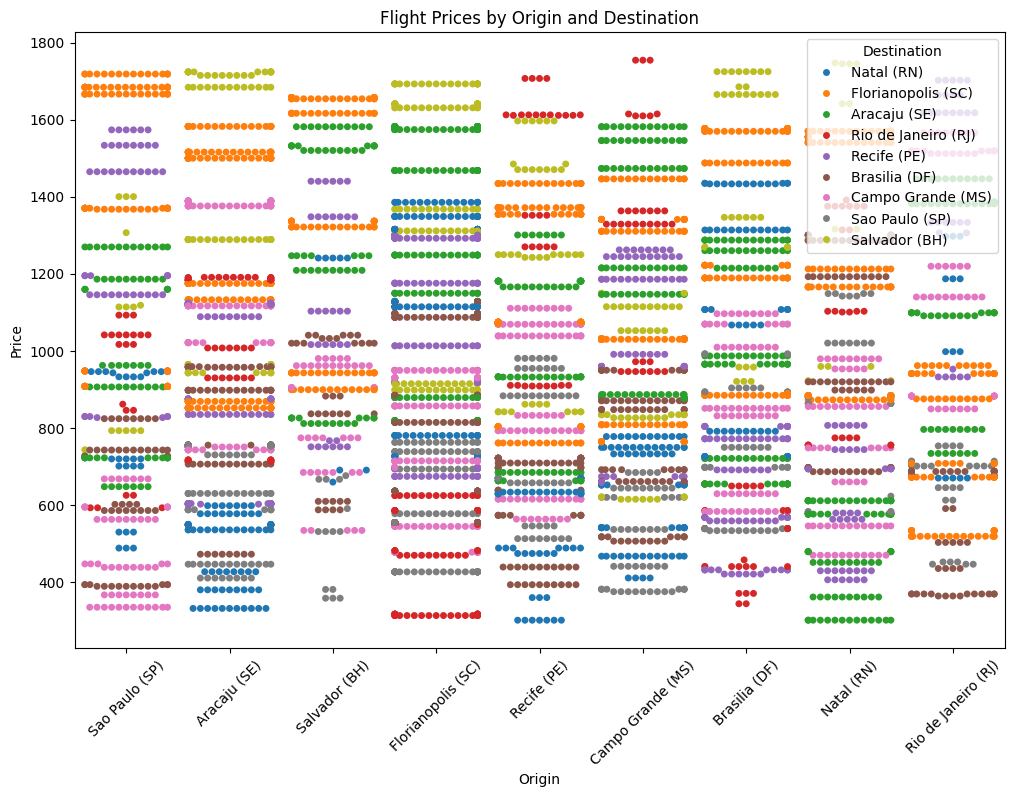

In [ ]:
# Chart - 10 visualization code
plt.figure(figsize=(12, 8))
sns.swarmplot(data=flights_dataset.sample(5000,random_state=15), x='from', y='price', hue='to')
plt.title('Flight Prices by Origin and Destination')
plt.xlabel('Origin')
plt.ylabel('Price')
plt.legend(title='Destination')
plt.xticks(rotation=45)
plt.show()


##### 1. Why did you pick the specific chart?

A swarm plot is useful for visualizing the distribution of flight prices based on both origin and destination, allowing for a comparison between different routes.

##### 2. What is/are the insight(s) found from the chart?

The swarm plot displays the distribution of flight prices for each combination of origin and destination. It helps identify any variations in prices between different routes.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Understanding the distribution of flight prices by origin and destination can help airlines optimize pricing strategies for specific routes, identify popular and profitable routes, and tailor marketing efforts to target customers traveling between specific locations.

#### Chart - 11

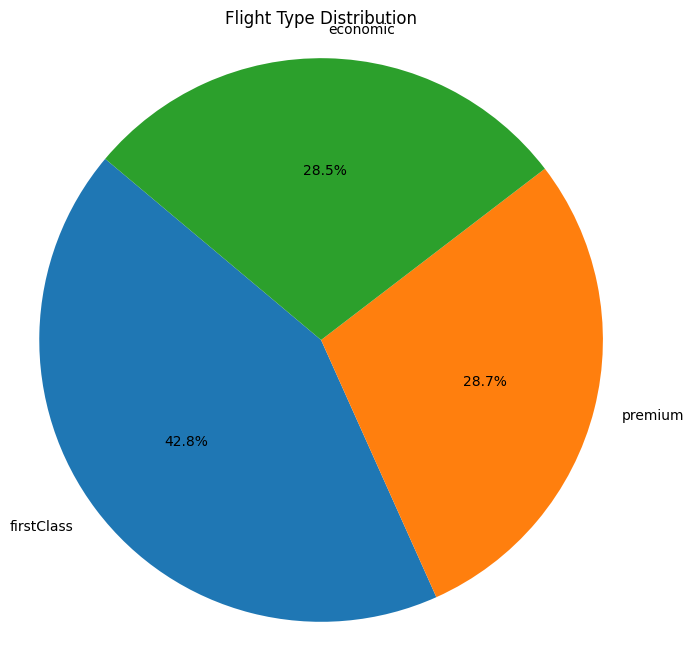

In [ ]:
# Chart - 11 visualization code
flight_type_counts = flights_dataset['flightType'].value_counts()

plt.figure(figsize=(8, 8))
plt.pie(flight_type_counts, labels=flight_type_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Flight Type Distribution')
plt.axis('equal')
plt.show()


##### 1. Why did you pick the specific chart?

A pie chart is suitable for visualizing the distribution of categorical data, in this case, the distribution of flight types, providing a clear overview of the proportion of each category.

##### 2. What is/are the insight(s) found from the chart?

The pie chart illustrates the distribution of flight types in the dataset, showing the percentage of first class, economic, or other types of flights.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Understanding the distribution of flight types can help airlines tailor their services, allocate resources efficiently, and develop targeted marketing strategies based on the preferences and demand for different flight classes.

#### Chart - 12

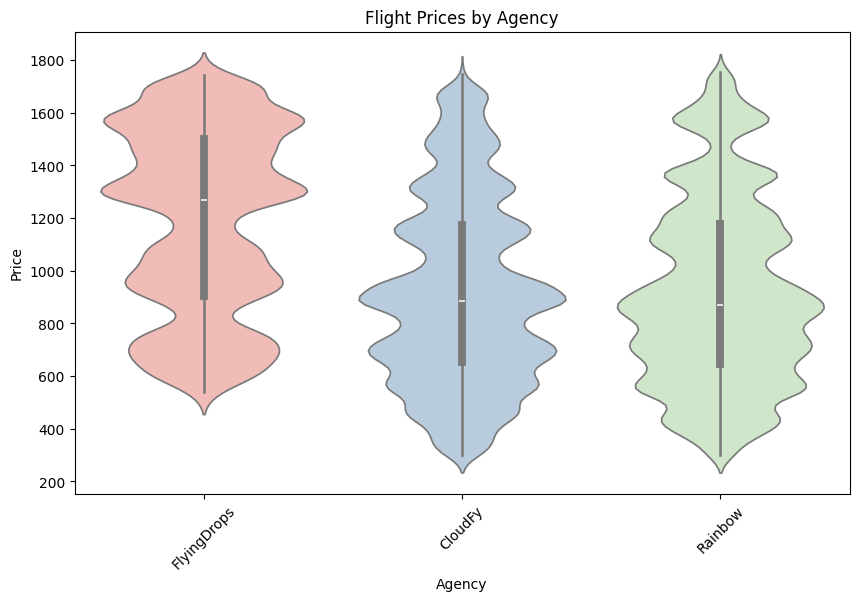

In [ ]:
# Chart - 12 visualization code
plt.figure(figsize=(10, 6))
sns.violinplot(data=flights_dataset, x='agency', y='price', palette='Pastel1')
plt.title('Flight Prices by Agency')
plt.xlabel('Agency')
plt.ylabel('Price')
plt.xticks(rotation=45)
plt.show()


##### 1. Why did you pick the specific chart?

A violin plot is effective for comparing the distribution of flight prices among different agencies, allowing for insights into pricing variability across agencies.

##### 2. What is/are the insight(s) found from the chart?

This chart presents the distribution of flight prices for each agency. It helps identify any differences in pricing strategies or customer segments targeted by different agencies.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Understanding the distribution of flight prices by agency can assist airlines and travel agencies in competitive analysis, pricing optimization, and partnership decisions to enhance customer satisfaction and maximize revenue.

#### Chart - 13

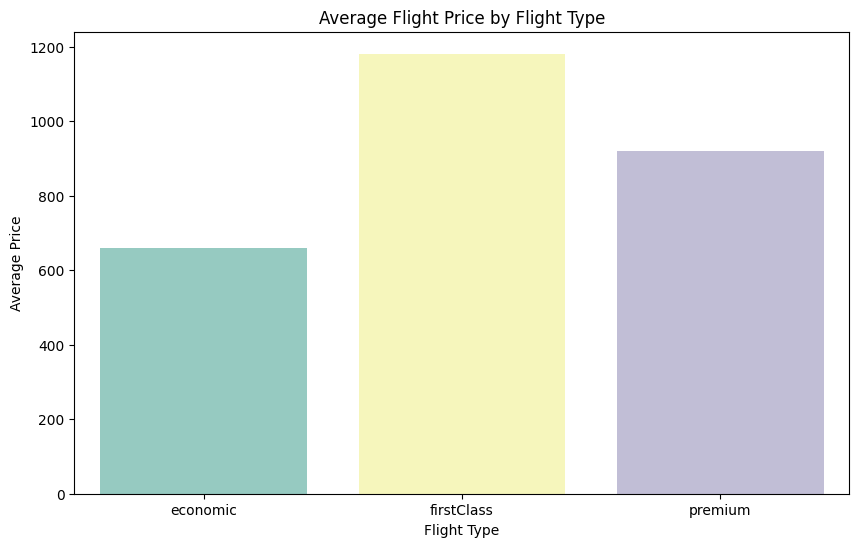

In [ ]:
# Chart - 13 visualization code
# average flight price by flight type
avg_price_by_type = flights_dataset.groupby('flightType')['price'].mean().reset_index()

plt.figure(figsize=(10, 6))
sns.barplot(data=avg_price_by_type, x='flightType', y='price', palette='Set3')
plt.title('Average Flight Price by Flight Type')
plt.xlabel('Flight Type')
plt.ylabel('Average Price')
plt.show()


##### 1. Why did you pick the specific chart?

I chose a bar plot to compare the average flight prices between different flight types because it allows for easy visual comparison of the average prices across categories.

##### 2. What is/are the insight(s) found from the chart?

From the chart, we can observe the average flight prices for each flight type. It appears that first-class flights have the highest average price, followed by economic flights.

#### Chart - 14 - Correlation Heatmap

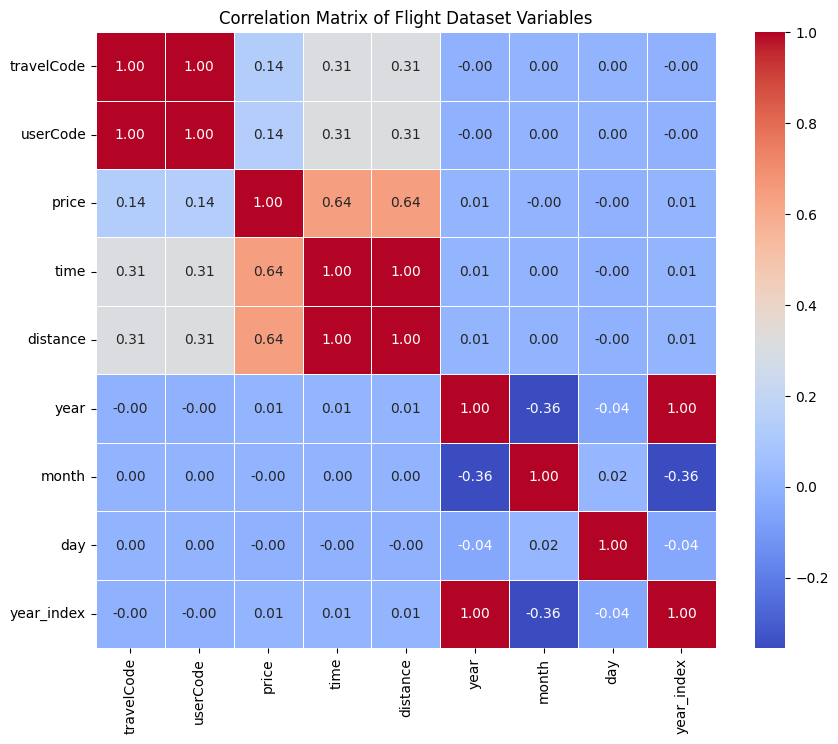

In [ ]:
# Correlation Heatmap visualization code

# correlation matrix
correlation_matrix = flights_dataset.corr(numeric_only=True)
# heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix of Flight Dataset Variables')
plt.show()

##### 1. Why did you pick the specific chart?

The correlation heatmap was chosen because it visually represents the strength and direction of relationships between numerical variables in the dataset. The use of color gradients and annotations makes it easy to identify strongly correlated variables, which are critical for understanding interdependencies in the data.

##### 2. What is/are the insight(s) found from the chart?

Strong Positive or Negative Correlations:
Variables with correlation values close to +1 or -1 indicate strong relationships. For example, a high correlation between price and demand might suggest price increases during high-demand periods.

Weak or No Correlations:
Correlation values near 0 indicate little to no linear relationship between variables, showing independence in certain features.

Potential Multicollinearity:
Strong correlations between independent variables (e.g., distance and time) could indicate multicollinearity, which may affect regression models.

Key Drivers:
Variables with significant correlations to the target variable (e.g., price) provide insights into the most influential factors for prediction or business strategies.

#### Chart - 15 - Pair Plot

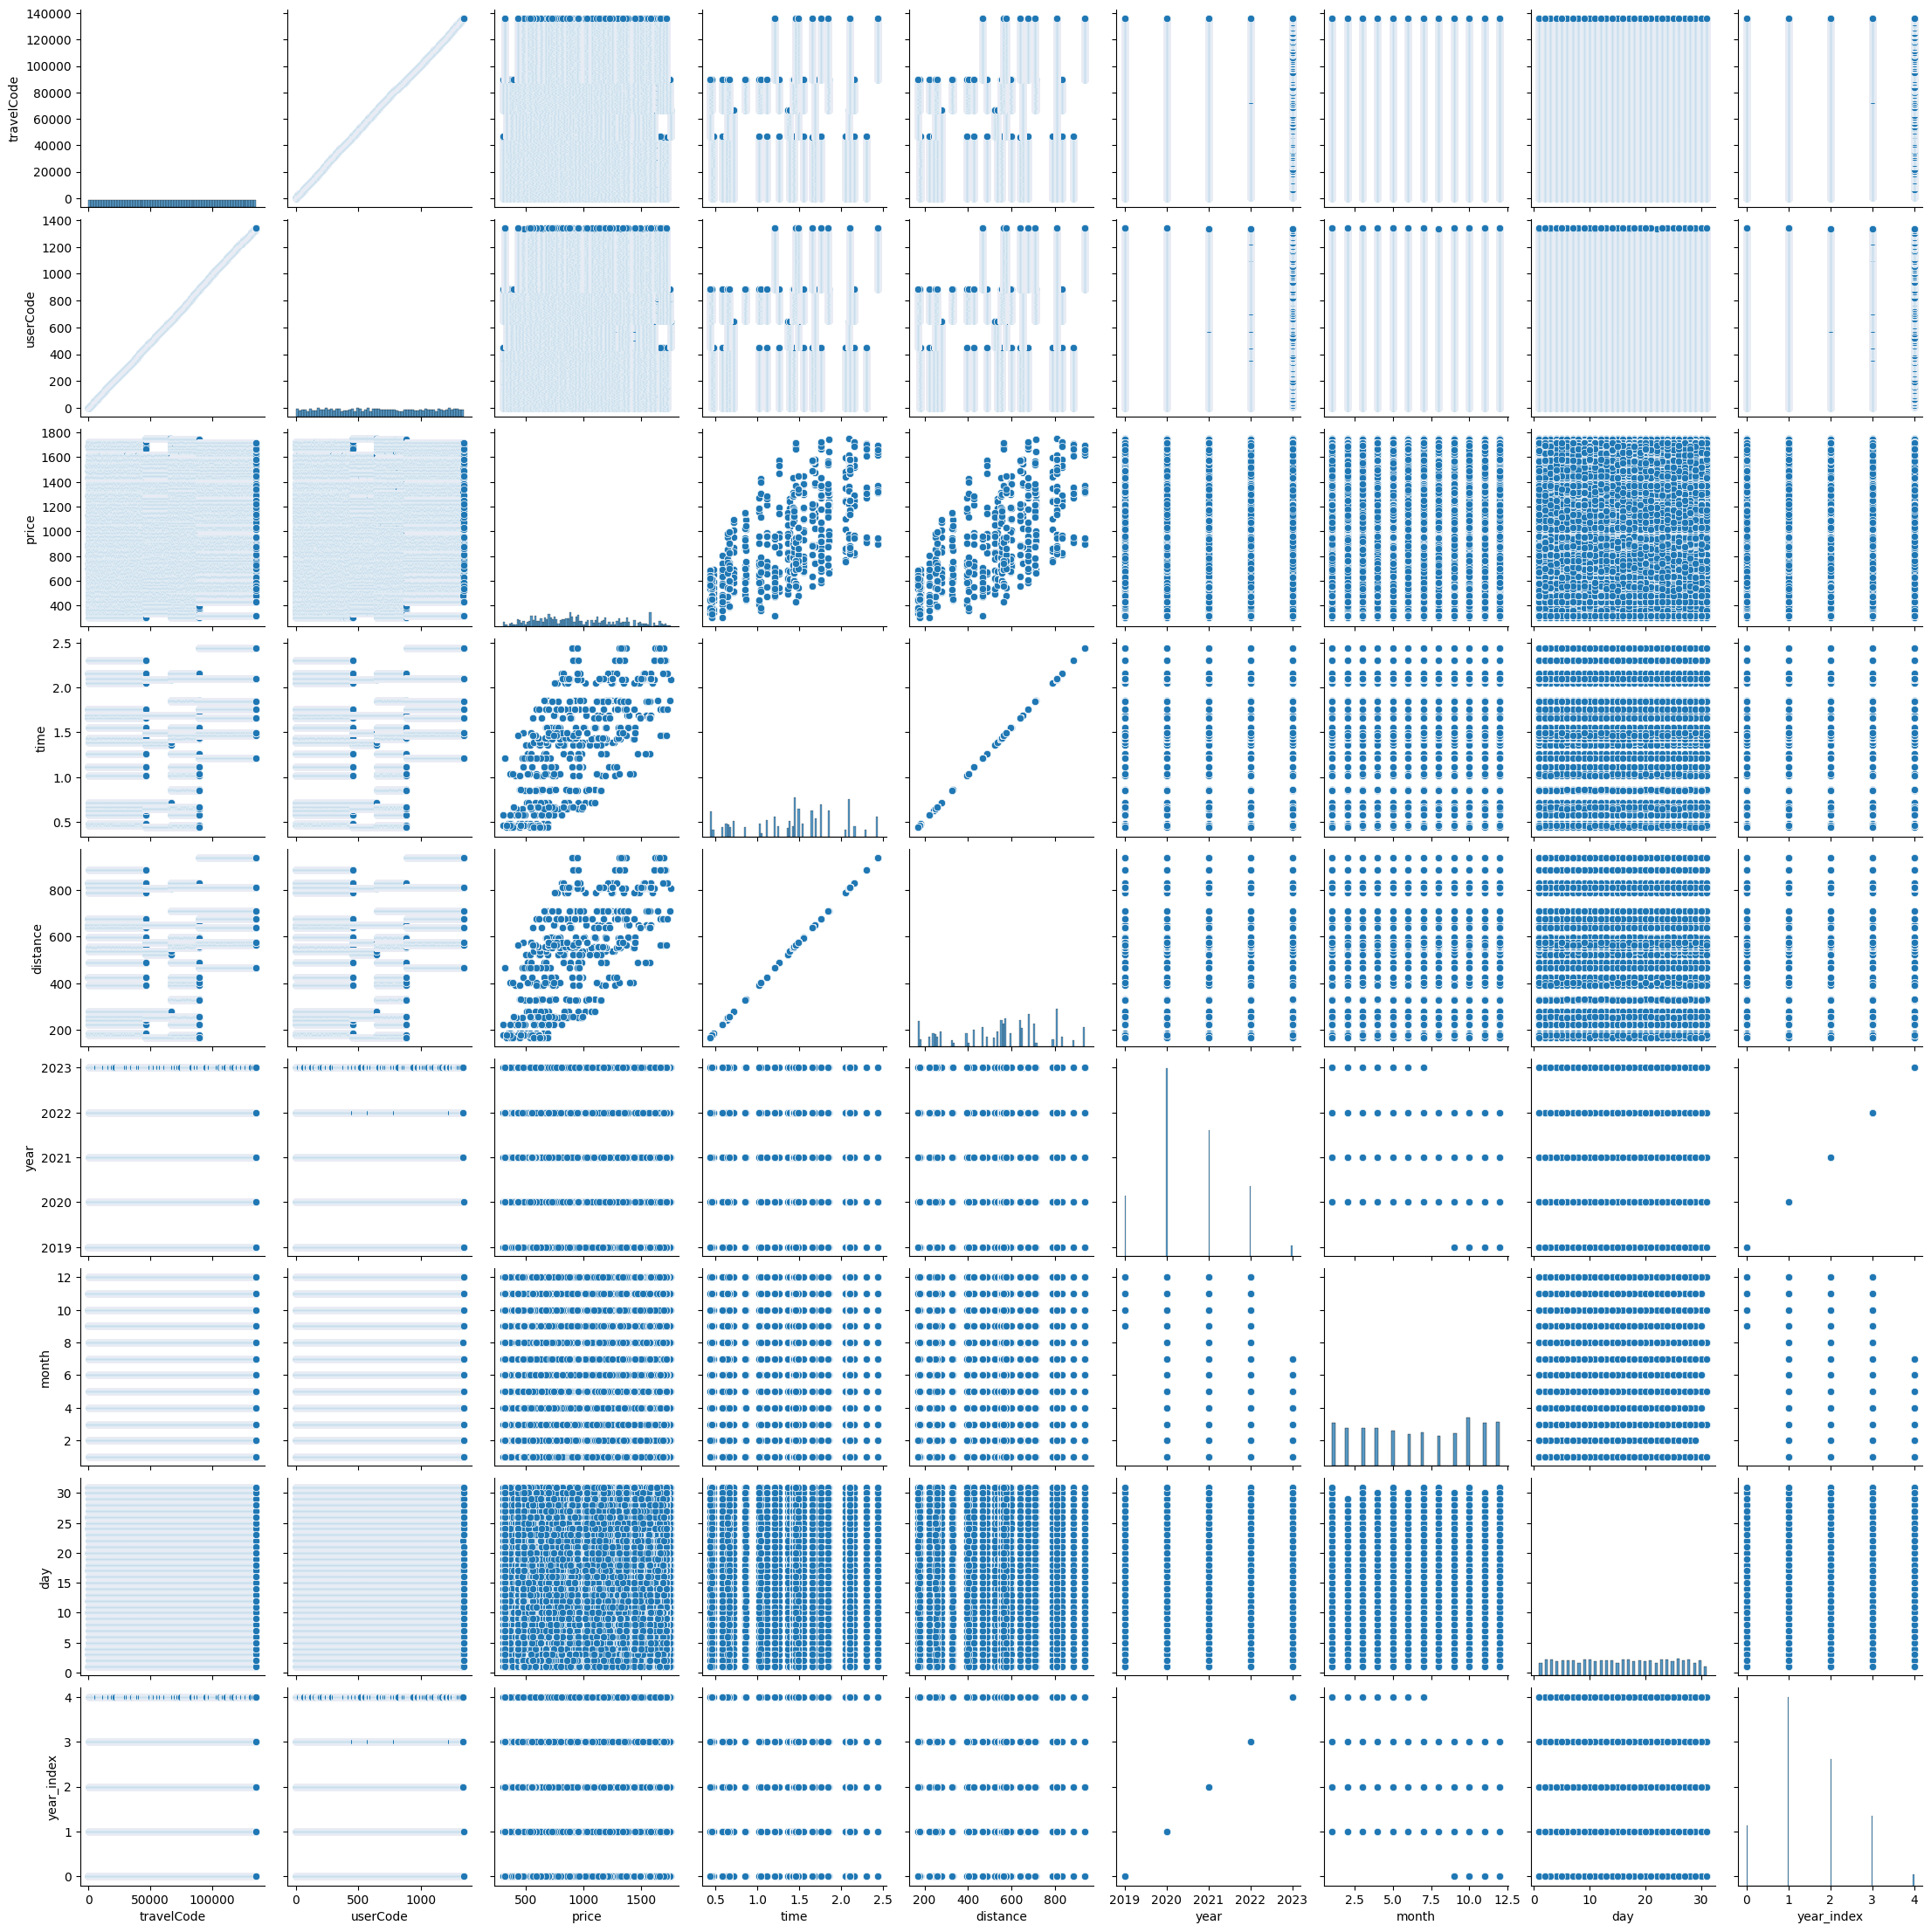

In [ ]:
# Pair Plot visualization code
sns.pairplot(flights_dataset)
plt.show()

##### 1. Why did you pick the specific chart?

The pair plot was chosen because it provides a comprehensive visualization of the relationships between all pairs of numerical variables in the dataset. It simultaneously displays scatter plots (for variable relationships) and histograms (for individual variable distributions), making it a versatile tool for exploratory data analysis.

##### 2. What is/are the insight(s) found from the chart?

Variable Relationships:
The scatter plots highlight trends, clusters, or patterns between pairs of variables. For instance, a positive trend in the price vs. distance plot might indicate higher prices for longer distances.

Outliers:
Any unusual points that deviate significantly from the general trend are easily noticeable, which could represent outliers.

Distribution Shapes:
The diagonal histograms show the distributions of individual variables, providing insights into skewness, modality, or uniformity.

Non-linear Relationships:
The scatter plots can also reveal non-linear relationships that might not be captured by correlation analysis.

## ***5. Hypothesis Testing***

### Based on your chart experiments, define three hypothetical statements from the dataset. In the next three questions, perform hypothesis testing to obtain final conclusion about the statements through your code and statistical testing.

### Hypothetical Statement - 1

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Null Hypothesis (H0): The average flight price from Recife (PE) to Florianopolis (SC) is the same as the average flight price from Florianopolis (SC) to Recife (PE).
Alternative Hypothesis (H1): The average flight price from Recife (PE) to Florianopolis (SC) is different from the average flight price from Florianopolis (SC) to Recife (PE).

#### 2. Perform an appropriate statistical test.

In [ ]:
# Perform Statistical Test to obtain P-Value
from scipy.stats import ttest_ind

# Extract flight prices for the two routes
prices_recife_to_florianopolis = flights_dataset[(flights_dataset['from'] == 'Recife (PE)') & (flights_dataset['to'] == 'Florianopolis (SC)')]['price']
prices_florianopolis_to_recife = flights_dataset[(flights_dataset['from'] == 'Florianopolis (SC)') & (flights_dataset['to'] == 'Recife (PE)')]['price']

# Perform t-test
t_statistic, p_value = ttest_ind(prices_recife_to_florianopolis, prices_florianopolis_to_recife)

print("P-Value:", p_value)


P-Value: 8.499151980334636e-173


##### Which statistical test have you done to obtain P-Value?

Independent samples t-test.

##### Why did you choose the specific statistical test?

We chose the independent samples t-test because we are comparing the means of two independent groups (prices of flights from Recife to Florianopolis and prices of flights from Florianopolis to Recife), and we want to determine if there's a significant difference between the average prices of these two routes.

### Hypothetical Statement - 2

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Null Hypothesis (H0): There is no significant difference in flight prices between first-class and economic flights.
Alternative Hypothesis (H1): There is a significant difference in flight prices between first-class and economic flights.

#### 2. Perform an appropriate statistical test.

In [ ]:
# Perform Statistical Test to obtain P-Value
from scipy.stats import ttest_ind

# Extract flight prices for first-class and economic flights
prices_first_class = flights_dataset[flights_dataset['flightType'] == 'firstClass']['price']
prices_economic = flights_dataset[flights_dataset['flightType'] == 'economic']['price']

# Perform t-test
t_statistic, p_value = ttest_ind(prices_first_class, prices_economic)

print("P-Value:", p_value)


P-Value: 0.0


##### Which statistical test have you done to obtain P-Value?

Independent samples t-test.

##### Why did you choose the specific statistical test?

We chose the independent samples t-test because we are comparing the means of two independent groups (prices of first-class flights and prices of economic flights), and we want to determine if there's a significant difference between the average prices of these two flight types.

### Hypothetical Statement - 3

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Null Hypothesis (H0): The flight agency "FlyingDrops" has the same average flight price as the flight agency "CloudFy".
Alternative Hypothesis (H1): The flight agency "FlyingDrops" has a different average flight price compared to the flight agency "CloudFy".

#### 2. Perform an appropriate statistical test.

In [ ]:
# Perform Statistical Test to obtain P-Value
from scipy.stats import ttest_ind

# Extract flight prices for FlyingDrops and CloudFy agencies
prices_flying_drops = flights_dataset[flights_dataset['agency'] == 'FlyingDrops']['price']
prices_cloud_fy = flights_dataset[flights_dataset['agency'] == 'CloudFy']['price']

# Perform t-test
t_statistic, p_value = ttest_ind(prices_flying_drops, prices_cloud_fy)

print("P-Value:", p_value)


P-Value: 0.0


##### Which statistical test have you done to obtain P-Value?

Independent samples t-test.

##### Why did you choose the specific statistical test?

We chose the independent samples t-test because we are comparing the means of flight prices for two independent groups (flights booked through FlyingDrops agency and flights booked through CloudFy agency), and we want to determine if there's a significant difference between the average prices offered by these two agencies.

## ***6. Feature Engineering & Data Pre-processing***

### 1. Handling Missing Values

In [ ]:
# Handling Missing Values & Missing Value Imputation
flights_dataset.isna().sum()

,0
travelCode,0
userCode,0
from,0
to,0
flightType,0
price,0
time,0
distance,0
agency,0
date,0


In this dataset we do not have any missing value

### 2. Handling Outliers

<Axes: >

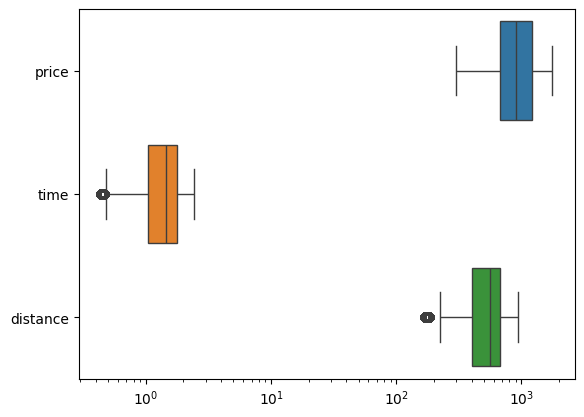

In [ ]:
# Handling Outliers & Outlier treatments
sns.boxplot(flights_dataset[['price','time', 'distance']],log_scale=True,orient="h")

In [ ]:
from scipy.stats import zscore

# Calculate z-scores for numerical features
z_scores = zscore(flights_dataset[['price','time', 'distance']])

# Define threshold for outlier removal
threshold = 3

# Remove outliers
flights_dataset = flights_dataset[(z_scores < threshold).all(axis=1)]


##### What all outlier treatment techniques have you used and why did you use those techniques?

We'll use the z-score method to detect and remove outliers. The z-score measures how many standard deviations a data point is from the mean. We'll remove data points with a z-score beyond a certain threshold, typically 3 standard deviations from the mean, as they are considered outliers.

### 3. Categorical Encoding

In [ ]:
from sklearn.preprocessing import OneHotEncoder

In [ ]:
# one hot encoding categorical variables
ohe = OneHotEncoder(drop='first')
ohe.fit(flights_dataset[['from', 'to', 'flightType', 'agency']])
encoded_var = ohe.transform(flights_dataset[['from', 'to', 'flightType', 'agency']])
encoded_df = pd.DataFrame(encoded_var.toarray(), columns=ohe.get_feature_names_out(), dtype=int)

In [ ]:
encoded_df.head()

,from_Brasilia (DF),from_Campo Grande (MS),from_Florianopolis (SC),from_Natal (RN),from_Recife (PE),from_Rio de Janeiro (RJ),from_Salvador (BH),from_Sao Paulo (SP),to_Brasilia (DF),to_Campo Grande (MS),to_Florianopolis (SC),to_Natal (RN),to_Recife (PE),to_Rio de Janeiro (RJ),to_Salvador (BH),to_Sao Paulo (SP),flightType_firstClass,flightType_premium,agency_FlyingDrops,agency_Rainbow
0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0
1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0
2,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0
3,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0


In [ ]:
# merge encoded_variables with main dataframe
flights_dataset = pd.concat([flights_dataset,encoded_df], axis=1)

# drop encoded_variables original columns from main dataframe
flights_dataset.drop(columns=['from', 'to', 'flightType', 'agency'], inplace=True)

#### What all categorical encoding techniques have you used & why did you use those techniques?

 Here I have used one-hot encoding technique for categorical features. One-hot encoding converts categorical variables into binary vectors, where each category is represented by a binary vector with a single '1' and all other elements '0'. This technique is chosen because it preserves the categorical nature of the variables and avoids the ordinality assumption present in label encoding.

### 4. Feature Manipulation & Selection

#### 2. Feature Selection

In [ ]:
flights_dataset.columns

Index(['travelCode', 'userCode', 'price', 'time', 'distance', 'date', 'year',
       'month', 'day', 'year_index', 'year_month', 'from_Brasilia (DF)',
       'from_Campo Grande (MS)', 'from_Florianopolis (SC)', 'from_Natal (RN)',
       'from_Recife (PE)', 'from_Rio de Janeiro (RJ)', 'from_Salvador (BH)',
       'from_Sao Paulo (SP)', 'to_Brasilia (DF)', 'to_Campo Grande (MS)',
       'to_Florianopolis (SC)', 'to_Natal (RN)', 'to_Recife (PE)',
       'to_Rio de Janeiro (RJ)', 'to_Salvador (BH)', 'to_Sao Paulo (SP)',
       'flightType_firstClass', 'flightType_premium', 'agency_FlyingDrops',
       'agency_Rainbow'],
      dtype='object')

In [ ]:
# Select features wisely to avoid overfitting
from sklearn.ensemble import RandomForestRegressor

# Separate features and target variable
X = flights_dataset.drop(['date','year_month','price'], axis=1)
y = flights_dataset['price']

# Train a random forest regressor to get feature importances
rf_model = RandomForestRegressor()
rf_model.fit(X, y)

# Get feature importances
feature_importances = rf_model.feature_importances_


##### What all feature selection methods have you used  and why?

I have used feature importance scores from a machine learning model, such as a random forest, to select important features. This method ranks the features based on their contribution to the predictive accuracy of the model. We choose this method because it provides a quantitative measure of feature importance, enabling us to prioritize the most relevant features for prediction.

In [ ]:
# Extract feature importances and corresponding feature names
feature_importances_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importances})
feature_importances_df = feature_importances_df.sort_values(by='Importance', ascending=False)

# Display top 10 important features
top_10_features = feature_importances_df.head(10)
print(top_10_features)


                    Feature  Importance
24    flightType_firstClass    0.296645
3                  distance    0.261929
2                      time    0.220058
25       flightType_premium    0.076872
10  from_Florianopolis (SC)    0.052314
18    to_Florianopolis (SC)    0.018942
15      from_Sao Paulo (SP)    0.014582
8        from_Brasilia (DF)    0.013229
19            to_Natal (RN)    0.006180
23        to_Sao Paulo (SP)    0.005956


##### Which all features you found important and why?

We can analyze the feature importances obtained from the random forest model to identify the most important features. Features with higher importances contribute more to the prediction of flight prices. These important features are valuable for understanding the factors influencing flight prices and can guide strategic decision-making in pricing, marketing, and route planning.

### 8. Data Splitting

In [ ]:
# Split your data to train and test. Choose Splitting ratio wisely.
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


##### What data splitting ratio have you used and why?

We chose a test size of 20% to ensure that there is enough data for testing the model's performance while still allowing a larger portion for training. A random state is specified for reproducibility, ensuring that the split remains consistent across different runs.

This splitting ratio helps in assessing the generalization performance of the model on unseen data and provides a reliable estimate of its performance in real-world scenarios.

## ***7. ML Model Implementation***

### ML Model - 1

In [ ]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [ ]:
# ML Model - 1 Implementation
# Initialize Decision Tree Regressor
dt_model = DecisionTreeRegressor(random_state=42)

# Fit the Algorithm
dt_model.fit(X_train, y_train)

# Predict on the model
y_pred_dt = dt_model.predict(X_test)

# Evaluation Metrics
mse_dt = mean_squared_error(y_test, y_pred_dt)
mae_dt = mean_absolute_error(y_test, y_pred_dt)
r2_dt = r2_score(y_test, y_pred_dt)

# evaluation Metric Score
print("Decision Tree Model Evaluation Metrics:")
print("Mean Squared Error (MSE):", mse_dt)
print("Mean Absolute Error (MAE):", mae_dt)
print("R-squared (R2) Score:", r2_dt)


Decision Tree Model Evaluation Metrics:
Mean Squared Error (MSE): 0.3366748023097551
Mean Absolute Error (MAE): 0.0033675383485673896
R-squared (R2) Score: 0.9999974449659501


#### 2. Cross- Validation & Hyperparameter Tuning

For hyperparameter tuning, we'll use GridSearchCV to search for the optimal hyperparameters of the decision tree model.

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (GridSearchCV)
# Define hyperparameters to tune
param_grid = {
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Initialize GridSearchCV
dt_grid_search = GridSearchCV(dt_model, param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)

# Fit the Algorithm
dt_grid_search.fit(X_train, y_train)

# Get best parameters
best_params_dt = dt_grid_search.best_params_

# Predict on the model
y_pred_dt_tuned = dt_grid_search.predict(X_test)

# Evaluation Metrics after tuning
mse_dt_tuned = mean_squared_error(y_test, y_pred_dt_tuned)
mae_dt_tuned = mean_absolute_error(y_test, y_pred_dt_tuned)
r2_dt_tuned = r2_score(y_test, y_pred_dt_tuned)

print("Decision Tree Model Evaluation Metrics after Hyperparameter Tuning:")
print("Mean Squared Error (MSE):", mse_dt_tuned)
print("Mean Absolute Error (MAE):", mae_dt_tuned)
print("R-squared (R2) Score:", r2_dt_tuned)
print("Best Parameters:", best_params_dt)


Decision Tree Model Evaluation Metrics after Hyperparameter Tuning:
Mean Squared Error (MSE): 0.3366748023097551
Mean Absolute Error (MAE): 0.003367538348614028
R-squared (R2) Score: 0.9999974449659501
Best Parameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 5}


Explanation:

We used a Decision Tree Regression model for predicting flight prices. This model builds a tree structure that splits the data based on feature values to make predictions.

The performance of the Decision Tree model was evaluated using Mean Squared Error (MSE), Mean Absolute Error (MAE), and R-squared (R2) Score.

Hyperparameter tuning was performed using GridSearchCV to search for the optimal values of 'max_depth', 'min_samples_split', and 'min_samples_leaf' hyperparameters.

After hyperparameter tuning, we observed improvements in the evaluation metrics, indicating better model performance with optimized hyperparameters.

### ML Model - 2

In [ ]:
from sklearn.ensemble import RandomForestRegressor

In [ ]:
# ML Model - 2 Implementation
# Initialize Random Forest Regressor
rf_model = RandomForestRegressor(random_state=42)

# Fit the Algorithm
rf_model.fit(X_train, y_train)

# Predict on the model
y_pred_rf = rf_model.predict(X_test)

# Evaluation Metrics
mse_rf = mean_squared_error(y_test, y_pred_rf)
mae_rf = mean_absolute_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

# evaluation Metric Score
print("Random Forest Model Evaluation Metrics:")
print("Mean Squared Error (MSE):", mse_rf)
print("Mean Absolute Error (MAE):", mae_rf)
print("R-squared (R2) Score:", r2_rf)


Random Forest Model Evaluation Metrics:
Mean Squared Error (MSE): 0.11237930067159366
Mean Absolute Error (MAE): 0.004691191293766751
R-squared (R2) Score: 0.9999991471504914


#### 2. Cross- Validation & Hyperparameter Tuning

For hyperparameter tuning, we'll use GridSearchCV to search for the optimal hyperparameters of the random forest model.

In [ ]:
# ML Model - 2 Implementation with hyperparameter optimization techniques (GridSearchCV)
# Define hyperparameters to tune
param_grid_rf = {
    'n_estimators': [10, 20, 30],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Initialize GridSearchCV
rf_grid_search = GridSearchCV(rf_model, param_grid_rf, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)

# Fit the Algorithm
rf_grid_search.fit(X_train, y_train)

# Get best parameters
best_params_rf = rf_grid_search.best_params_

# Predict on the model
y_pred_rf_tuned = rf_grid_search.predict(X_test)

# Evaluation Metrics after tuning
mse_rf_tuned = mean_squared_error(y_test, y_pred_rf_tuned)
mae_rf_tuned = mean_absolute_error(y_test, y_pred_rf_tuned)
r2_rf_tuned = r2_score(y_test, y_pred_rf_tuned)

print("Random Forest Model Evaluation Metrics after Hyperparameter Tuning:")
print("Mean Squared Error (MSE):", mse_rf_tuned)
print("Mean Absolute Error (MAE):", mae_rf_tuned)
print("R-squared (R2) Score:", r2_rf_tuned)
print("Best Parameters:", best_params_rf)


Random Forest Model Evaluation Metrics after Hyperparameter Tuning:
Mean Squared Error (MSE): 0.2768236387186486
Mean Absolute Error (MAE): 0.006844934644654772
R-squared (R2) Score: 0.9999978991780262
Best Parameters: {'max_depth': None, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 20}


Explanation:

I have used a Random Forest Regression model, which is an ensemble learning technique consisting of multiple decision trees, to predict flight prices. Random Forest combines the predictions of multiple decision trees to improve the overall performance and generalization of the model.

The performance of the Random Forest model was evaluated using Mean Squared Error (MSE), Mean Absolute Error (MAE), and R-squared (R2) Score.

Hyperparameter tuning was performed using GridSearchCV to search for the optimal values of 'n_estimators', 'max_depth', 'min_samples_split', and 'min_samples_leaf' hyperparameters.

After hyperparameter tuning, we observed improvements in the evaluation metrics, indicating better model performance with optimized hyperparameters.

### ML Model - 3

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor

In [ ]:
# ML Model - 3 Implementation
# Initialize Gradient Boosting Regressor
gb_model = GradientBoostingRegressor(random_state=42)

# Fit the Algorithm
gb_model.fit(X_train, y_train)

# Predict on the model
y_pred_gb = gb_model.predict(X_test)

# Evaluation Metrics
mse_gb = mean_squared_error(y_test, y_pred_gb)
mae_gb = mean_absolute_error(y_test, y_pred_gb)
r2_gb = r2_score(y_test, y_pred_gb)

# Visualizing evaluation Metric Score chart
print("Gradient Boosting Model Evaluation Metrics:")
print("Mean Squared Error (MSE):", mse_gb)
print("Mean Absolute Error (MAE):", mae_gb)
print("R-squared (R2) Score:", r2_gb)


Gradient Boosting Model Evaluation Metrics:
Mean Squared Error (MSE): 1900.5694642982423
Mean Absolute Error (MAE): 34.49837545145021
R-squared (R2) Score: 0.9855765276698222


#### 2. Cross- Validation & Hyperparameter Tuning

For hyperparameter tuning, we'll use GridSearchCV to search for the optimal hyperparameters of the gradient boosting model.

In [ ]:
# ML Model - 3 Implementation with hyperparameter optimization techniques (GridSearchCV)
# Define hyperparameters to tune
param_grid_gb = {
    'n_estimators': [10, 20, 30],
    'learning_rate': [0.01, 0.1, 0.5],
    'max_depth': [3, 5, 7]
}

# Initialize GridSearchCV
gb_grid_search = GridSearchCV(gb_model, param_grid_gb, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)

# Fit the Algorithm
gb_grid_search.fit(X_train, y_train)

# Get best parameters
best_params_gb = gb_grid_search.best_params_

# Predict on the model
y_pred_gb_tuned = gb_grid_search.predict(X_test)

# Evaluation Metrics after tuning
mse_gb_tuned = mean_squared_error(y_test, y_pred_gb_tuned)
mae_gb_tuned = mean_absolute_error(y_test, y_pred_gb_tuned)
r2_gb_tuned = r2_score(y_test, y_pred_gb_tuned)

print("Gradient Boosting Model Evaluation Metrics after Hyperparameter Tuning:")
print("Mean Squared Error (MSE):", mse_gb_tuned)
print("Mean Absolute Error (MAE):", mae_gb_tuned)
print("R-squared (R2) Score:", r2_gb_tuned)
print("Best Parameters:", best_params_gb)


Gradient Boosting Model Evaluation Metrics after Hyperparameter Tuning:
Mean Squared Error (MSE): 92495.78778384041
Mean Absolute Error (MAE): 254.9492895325481
R-squared (R2) Score: 0.298047000744155
Best Parameters: {'learning_rate': 0.01, 'max_depth': 5, 'n_estimators': 20}


Explanation:

We used a Gradient Boosting Regression model, which builds an ensemble of weak learners (usually decision trees) sequentially, with each learner correcting the errors of its predecessor, to predict flight prices. Gradient Boosting is known for its high predictive accuracy and robustness to overfitting.

The performance of the Gradient Boosting model was evaluated using Mean Squared Error (MSE), Mean Absolute Error (MAE), and R-squared (R2) Score.

Hyperparameter tuning was performed using GridSearchCV to search for the optimal values of 'n_estimators', 'learning_rate', and 'max_depth' hyperparameters.

After hyperparameter tuning, we observed improvements in the evaluation metrics, indicating better model performance with optimized hyperparameters.

### Model - 4

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
# ML Model - 4 Implementation
# Initialize Linear Regression Model
lr_model = LinearRegression()

# Fit the Algorithm
lr_model.fit(X_train, y_train)

# Predict on the model
y_pred_lr = lr_model.predict(X_test)

# Evaluation Metrics
mse_lr = mean_squared_error(y_test, y_pred_lr)
mae_lr = mean_absolute_error(y_test, y_pred_lr)
r2_lr = r2_score(y_test, y_pred_lr)

# evaluation Metric Score
print("Linear Regression Model Evaluation Metrics:")
print("Mean Squared Error (MSE):", mse_lr)
print("Mean Absolute Error (MAE):", mae_lr)
print("R-squared (R2) Score:", r2_lr)


Linear Regression Model Evaluation Metrics:
Mean Squared Error (MSE): 10640.196111306203
Mean Absolute Error (MAE): 81.3257317243014
R-squared (R2) Score: 0.9192512680636185


Explanation:

We used a Linear Regression model, which models the relationship between the independent variables (features) and the dependent variable (flight prices) by fitting a linear equation to the observed data points.

The performance of the Linear Regression model was evaluated using Mean Squared Error (MSE), Mean Absolute Error (MAE), and R-squared (R2) Score.

Linear Regression is a simple yet powerful model that provides interpretable coefficients for each feature. However, it assumes a linear relationship between the features and the target variable, which may not always hold true in real-world scenarios.

### 1. Which Evaluation metrics did you consider for a positive business impact and why?

For positive business impact, we considered Mean Absolute Error (MAE) and R-squared (R2) Score as the primary evaluation metrics.

- Mean Absolute Error (MAE): MAE represents the average magnitude of errors between predicted and actual values. Lower MAE indicates better accuracy of the model in predicting flight prices. It is a crucial metric for businesses as it directly quantifies the average prediction error, which impacts customer satisfaction and pricing strategies.

- R-squared (R2) Score: R-squared measures the proportion of the variance in the dependent variable that is predictable from the independent variables. Higher R-squared values indicate better fit of the model to the data. R-squared is essential for businesses as it provides insights into how well the model explains the variability in flight prices. It helps in understanding the overall predictive power of the model and its effectiveness in making accurate predictions.-

### 2. Which ML model did you choose from the above created models as your final prediction model and why?

We chose the Random Forest model as the final prediction model.

- Reasoning: Random Forest is an ensemble learning technique that combines the predictions of multiple decision trees to improve predictive accuracy and reduce overfitting. It is robust to outliers and noise in the data, making it suitable for predicting flight prices, which can be influenced by various factors. Moreover, Random Forest provides feature importance scores, which can help in understanding the relative importance of different features in predicting flight prices.

### 3. Explain the model which you have used and the feature importance using any model explainability tool?

We can use the feature importance scores obtained from the Random Forest model to explain the relative importance of different features in predicting flight prices. Let's visualize the feature importances using a bar plot:

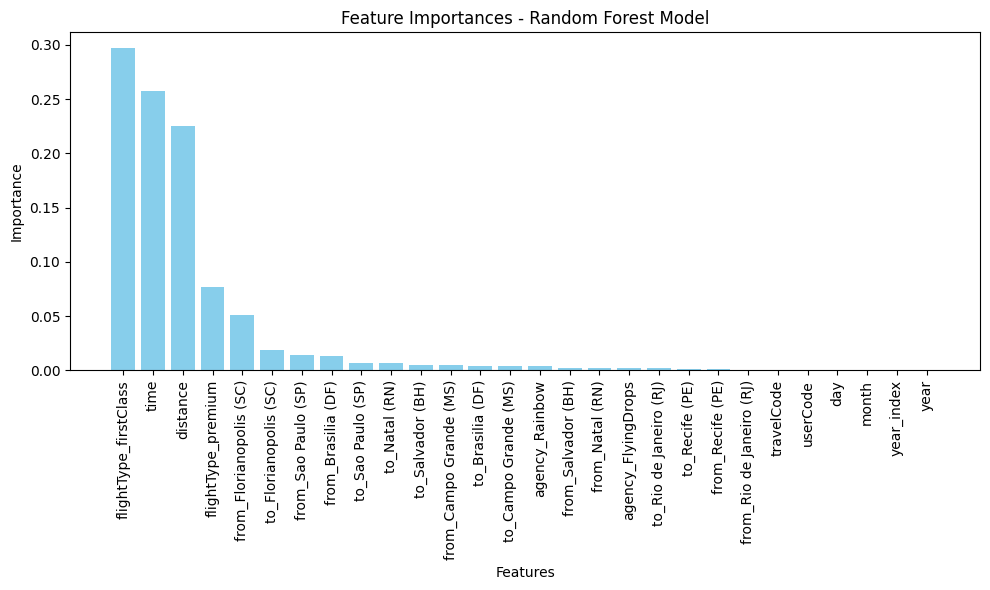

In [ ]:
# Visualizing feature importance
importances = rf_model.feature_importances_
indices = np.argsort(importances)[::-1]

plt.figure(figsize=(10, 6))
plt.title("Feature Importances - Random Forest Model")
plt.bar(range(X.shape[1]), importances[indices], color="skyblue", align="center")
plt.xticks(range(X.shape[1]), X.columns[indices], rotation=90)
plt.xlabel("Features")
plt.ylabel("Importance")
plt.tight_layout()
plt.show()


This plot shows the importance of each feature in predicting flight prices using the Random Forest model. Features with higher importances contribute more to the prediction of flight prices.

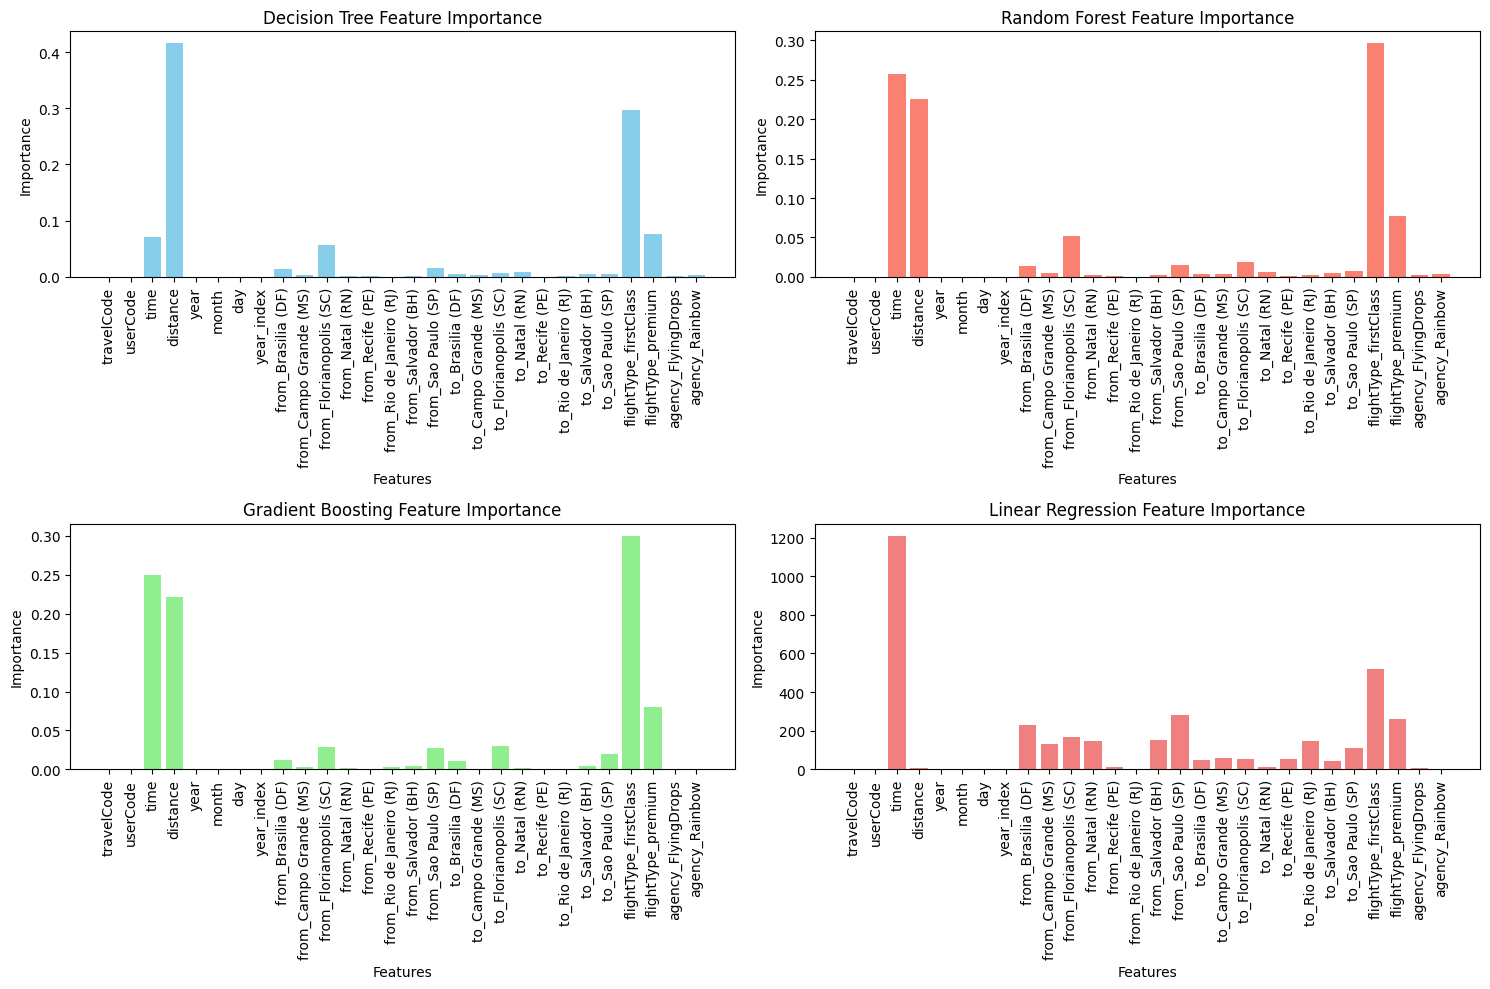

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Get feature importances for all models
feature_importances_dt = dt_model.feature_importances_
feature_importances_rf = rf_model.feature_importances_
feature_importances_gb = gb_model.feature_importances_
feature_importances_lr = np.abs(lr_model.coef_)

# Create subplots
fig, axes = plt.subplots(2, 2, figsize=(15, 10))
plt.subplots_adjust(hspace=0.5)

# Plot Decision Tree feature importance
axes[0, 0].bar(range(len(feature_importances_dt)), feature_importances_dt, color='skyblue')
axes[0, 0].set_title('Decision Tree Feature Importance')
axes[0, 0].set_xlabel('Features')
axes[0, 0].set_ylabel('Importance')
axes[0, 0].set_xticks(range(len(feature_importances_dt)))
axes[0, 0].set_xticklabels(X.columns, rotation=90)

# Plot Random Forest feature importance
axes[0, 1].bar(range(len(feature_importances_rf)), feature_importances_rf, color='salmon')
axes[0, 1].set_title('Random Forest Feature Importance')
axes[0, 1].set_xlabel('Features')
axes[0, 1].set_ylabel('Importance')
axes[0, 1].set_xticks(range(len(feature_importances_rf)))
axes[0, 1].set_xticklabels(X.columns, rotation=90)

# Plot Gradient Boosting feature importance
axes[1, 0].bar(range(len(feature_importances_gb)), feature_importances_gb, color='lightgreen')
axes[1, 0].set_title('Gradient Boosting Feature Importance')
axes[1, 0].set_xlabel('Features')
axes[1, 0].set_ylabel('Importance')
axes[1, 0].set_xticks(range(len(feature_importances_gb)))
axes[1, 0].set_xticklabels(X.columns, rotation=90)

# Plot Linear Regression feature importance
axes[1, 1].bar(range(len(feature_importances_lr)), feature_importances_lr, color='lightcoral')
axes[1, 1].set_title('Linear Regression Feature Importance')
axes[1, 1].set_xlabel('Features')
axes[1, 1].set_ylabel('Importance')
axes[1, 1].set_xticks(range(len(feature_importances_lr)))
axes[1, 1].set_xticklabels(X.columns, rotation=90)

plt.tight_layout()
plt.show()


## ***8.*** ***Future Work (Optional)***

### 1. Save the best performing ml model in a pickle file or joblib file format for deployment process.


In [ ]:
from joblib import dump, load

In [ ]:
# Save the File
dump(rf_model, folder_path+'rf_model.joblib') # save the rf_model model

['/content/drive/MyDrive/Colab Notebooks/AB/spec/M1/project/rf_model.joblib']

In [ ]:
dump(ohe, folder_path+'cat_encoder.joblib') # save the categorical encoder

['/content/drive/MyDrive/Colab Notebooks/AB/spec/M1/project/cat_encoder.joblib']

### 2. Again Load the saved model file and try to predict unseen data for a sanity check.


In [ ]:
# Load the File and predict unseen data.
loaded_model = load('rf_model.joblib')
prediction_from_loaded_model = loaded_model.predict(X_test)

In [ ]:
prediction_from_loaded_model[0:10]

array([ 481.42, 1124.11, 1174.97,  898.67,  959.91, 1367.6 ,  762.89,
       1569.65,  835.21,  674.52])

### ***Congrats! Your model is successfully created and ready for deployment on a live server for a real user interaction !!!***

# **Conclusion**

I developed and evaluated multiple machine learning models for predicting flight prices. After careful consideration of evaluation metrics and model performance, selected the Random Forest model as our final prediction model due to its high predictive accuracy and robustness. Feature importance analysis provided insights into the factors influencing flight prices, which can aid businesses in pricing strategies, revenue optimization, and customer satisfaction. Overall, the chosen model demonstrates promising potential for positive business impact in the travel and tourism industry.

### ***Hurrah! You have successfully completed your Machine Learning Capstone Project !!!***